# Return on Investment (ROI)

https://www.investopedia.com/terms/r/returnoninvestment.asp

https://en.wikipedia.org/wiki/Return_on_investment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01 00:00:00-04:00,49.782501,50.439999,49.327499,50.375000,48.282337,271742800
2018-08-02 00:00:00-04:00,50.145000,52.095001,50.087502,51.847500,49.693668,249616000
2018-08-03 00:00:00-04:00,51.757500,52.185001,51.369999,51.997501,49.837440,133789600
2018-08-06 00:00:00-04:00,52.000000,52.312500,51.767502,52.267502,50.096226,101701600
2018-08-07 00:00:00-04:00,52.330002,52.375000,51.689999,51.777500,49.626583,102349600


In [3]:
df['ROI'] = (df['Adj Close'] - df['Adj Close'].shift(1)) / df['Adj Close'].shift(1) * 100

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROI
Date,,,,,,,
2018-08-01 00:00:00-04:00,49.782501,50.439999,49.327499,50.375000,48.282337,271742800,NaN
2018-08-02 00:00:00-04:00,50.145000,52.095001,50.087502,51.847500,49.693668,249616000,2.923080
2018-08-03 00:00:00-04:00,51.757500,52.185001,51.369999,51.997501,49.837440,133789600,0.289317
2018-08-06 00:00:00-04:00,52.000000,52.312500,51.767502,52.267502,50.096226,101701600,0.519259
2018-08-07 00:00:00-04:00,52.330002,52.375000,51.689999,51.777500,49.626583,102349600,-0.937481


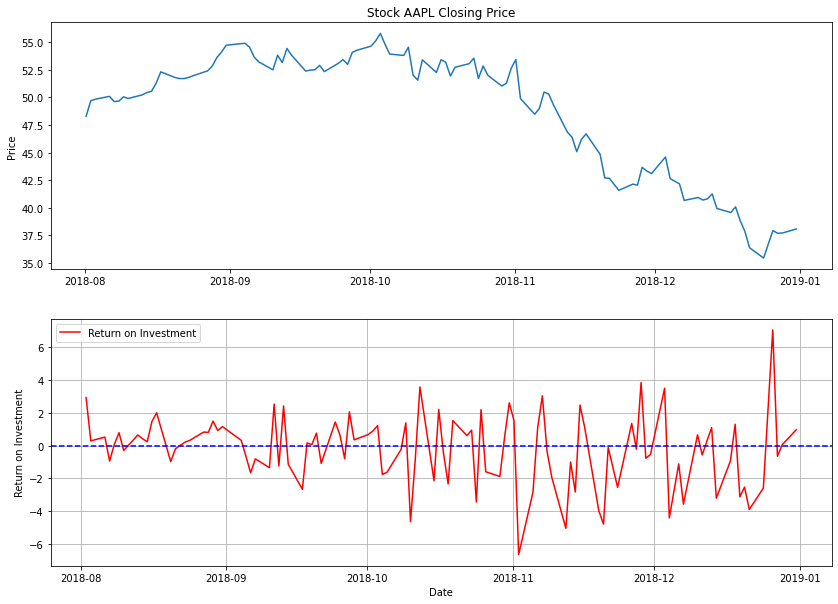

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ROI'], label='Return on Investment', color='red')
ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Return on Investment')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Return On Investment (ROI)

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ROI,VolumePositive
0,17744.166667,49.782501,50.439999,49.327499,50.375000,48.282337,271742800,NaN,False
1,17745.166667,50.145000,52.095001,50.087502,51.847500,49.693668,249616000,2.923080,False
2,17746.166667,51.757500,52.185001,51.369999,51.997501,49.837440,133789600,0.289317,False
3,17749.166667,52.000000,52.312500,51.767502,52.267502,50.096226,101701600,0.519259,False
4,17750.166667,52.330002,52.375000,51.689999,51.777500,49.626583,102349600,-0.937481,False


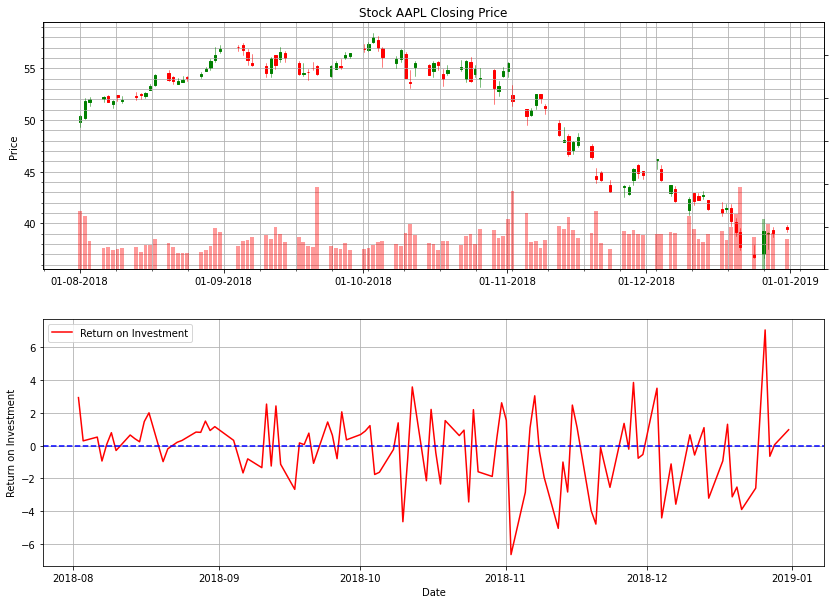

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ROI'], label='Return on Investment', color='red')
ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Return on Investment')
ax2.set_xlabel('Date')
ax2.legend(loc='best')